# EDA — Loan Approval Prediction

This notebook performs a **detailed Exploratory Data Analysis (EDA)** for the *Data-Driven Loan Approval Prediction System* project. Follow each cell sequentially.

---

In [1]:
# 1) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set(style='whitegrid')
print("Libraries loaded")

Libraries loaded


In [3]:
# 2) Load dataset
data_path = "../data/raw/loan_approval_dataset.csv"
df = pd.read_csv(data_path)
print(f"Dataset loaded from: {data_path}")
print("Shape:", df.shape)

Dataset loaded from: ../data/raw/loan_approval_dataset.csv
Shape: (4269, 13)


In [4]:
# 3) Quick peek
display(df.head())
print("\nData types:")
display(df.dtypes)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected



Data types:


loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [5]:
# 4) Summary statistics (numeric)
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [6]:
# 5) Missing values & duplicates
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Columns with missing values (if any):")
display(missing)

dupes = df.duplicated().sum()
print(f"Number of duplicate rows: {dupes}")

Columns with missing values (if any):


Series([], dtype: int64)

Number of duplicate rows: 0


In [7]:
# 6) Identify categorical vs numerical
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: [' education', ' self_employed', ' loan_status']
Numerical columns: ['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']


Using target column:  loan_status


 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

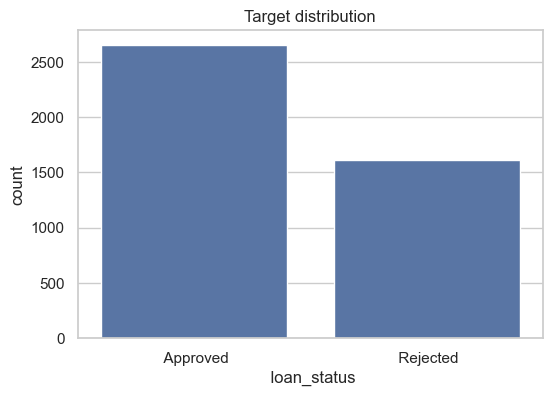

In [14]:
# 7) Target distribution
if ' loan_status' in df.columns:
    target_col = ' loan_status'
else:
    target_candidates = [c for c in df.columns if 'status' in c.lower()]
    target_col = target_candidates[0] if target_candidates else None

print("Using target column:", target_col)
display(df[target_col].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x=df[target_col])
plt.title("Target distribution")
plt.show()

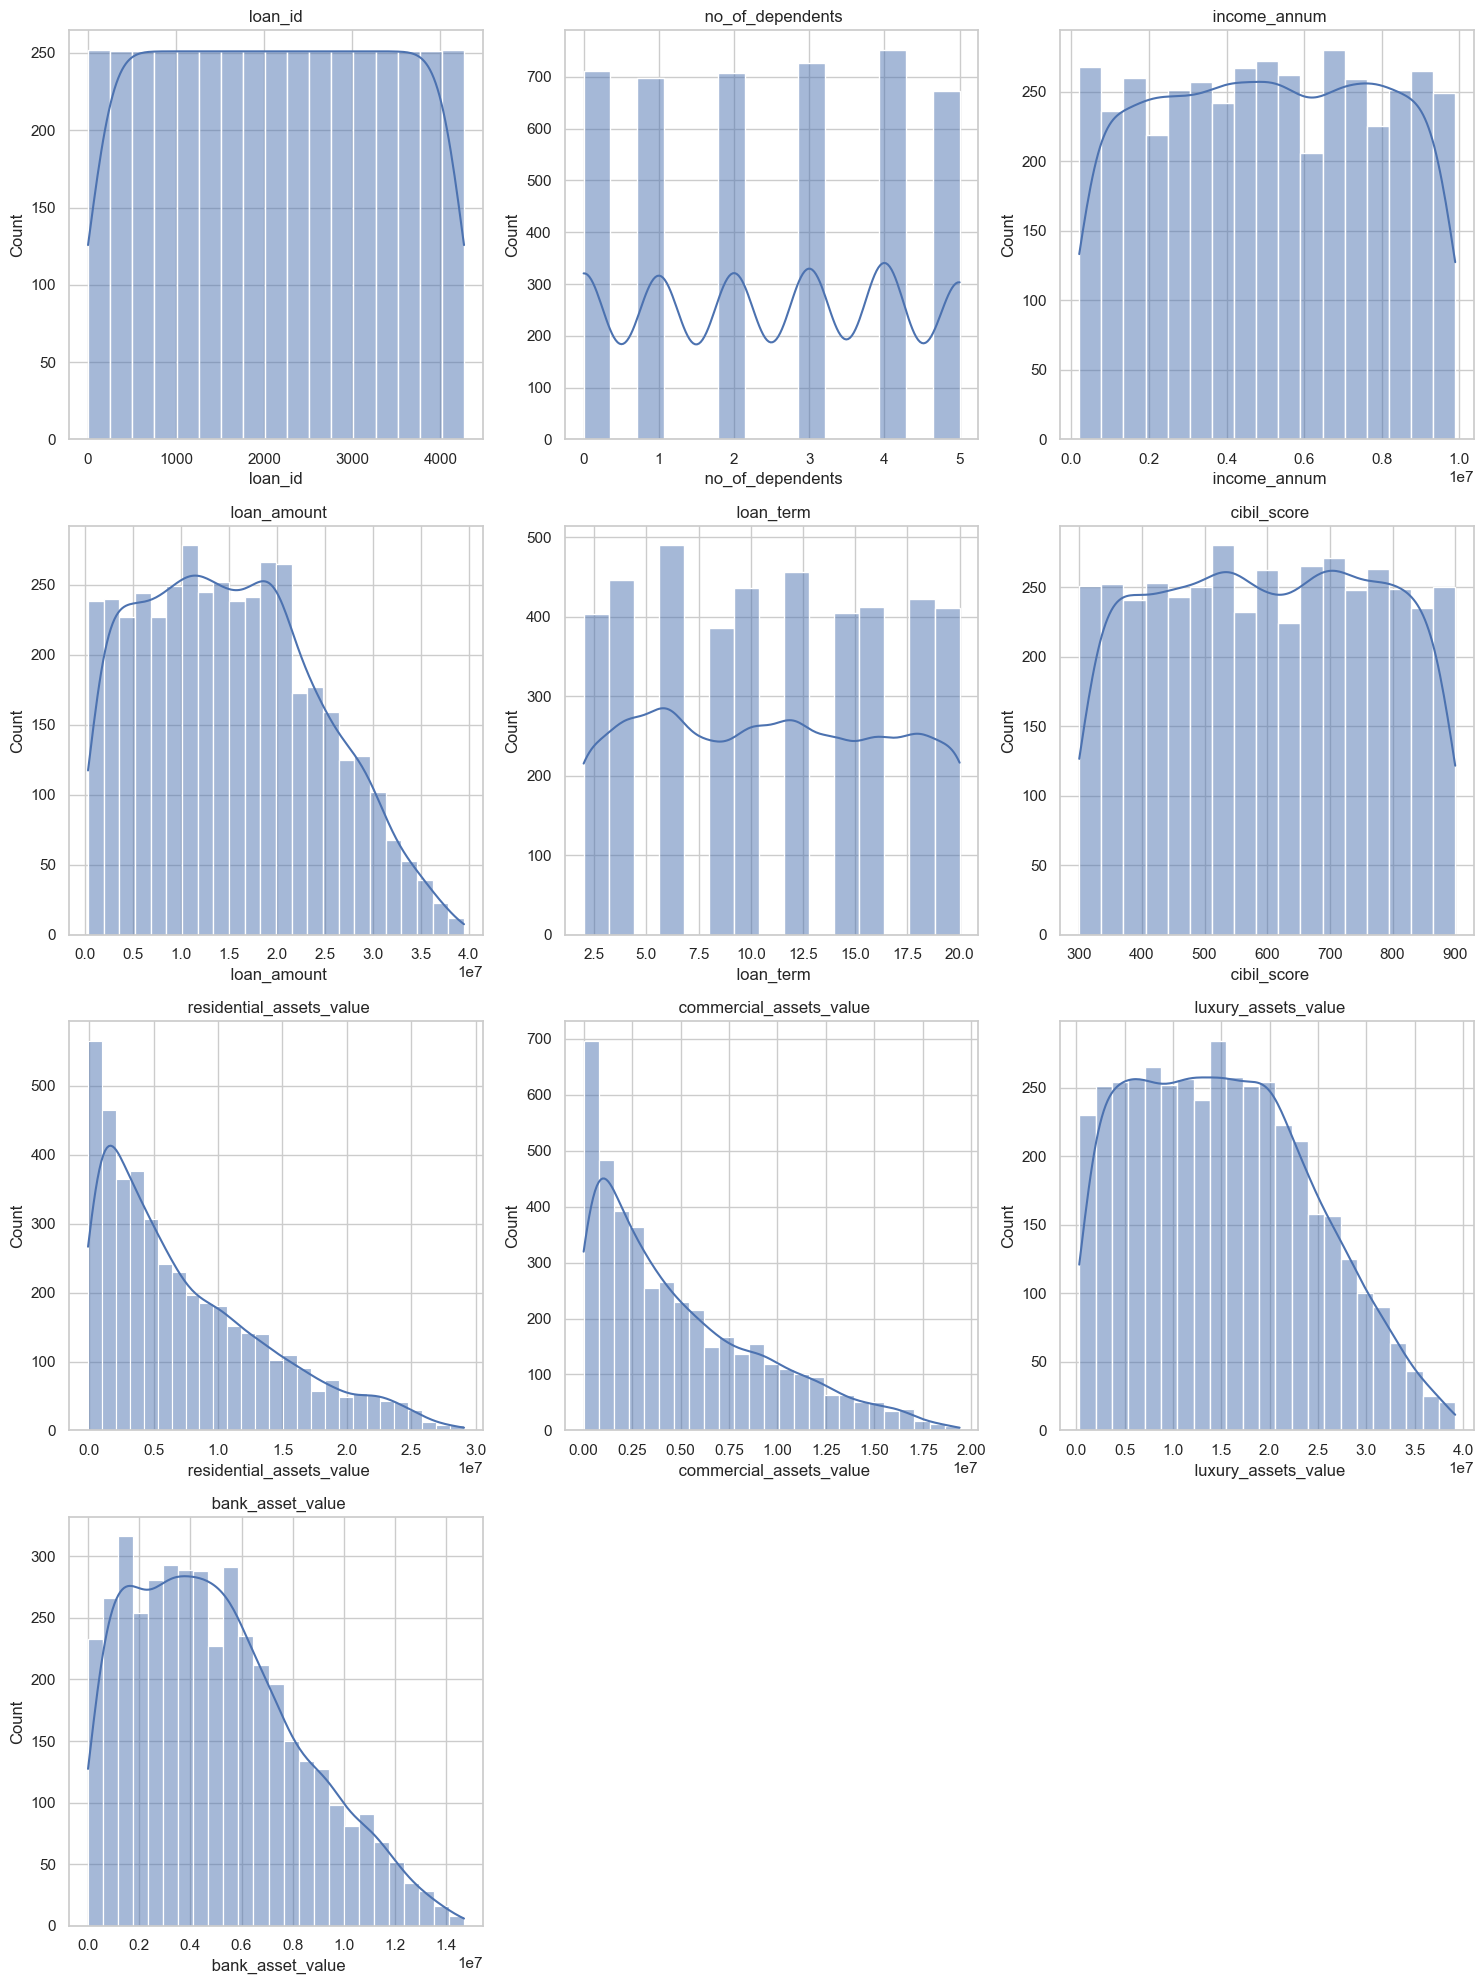

In [9]:
# 8) Univariate analysis - numeric distributions
import math
n = len(num_cols)
cols = num_cols.copy()

# plot histograms for numeric columns (grid)
rows = math.ceil(n/3)
plt.figure(figsize=(15, 5*rows))
for i, col in enumerate(cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

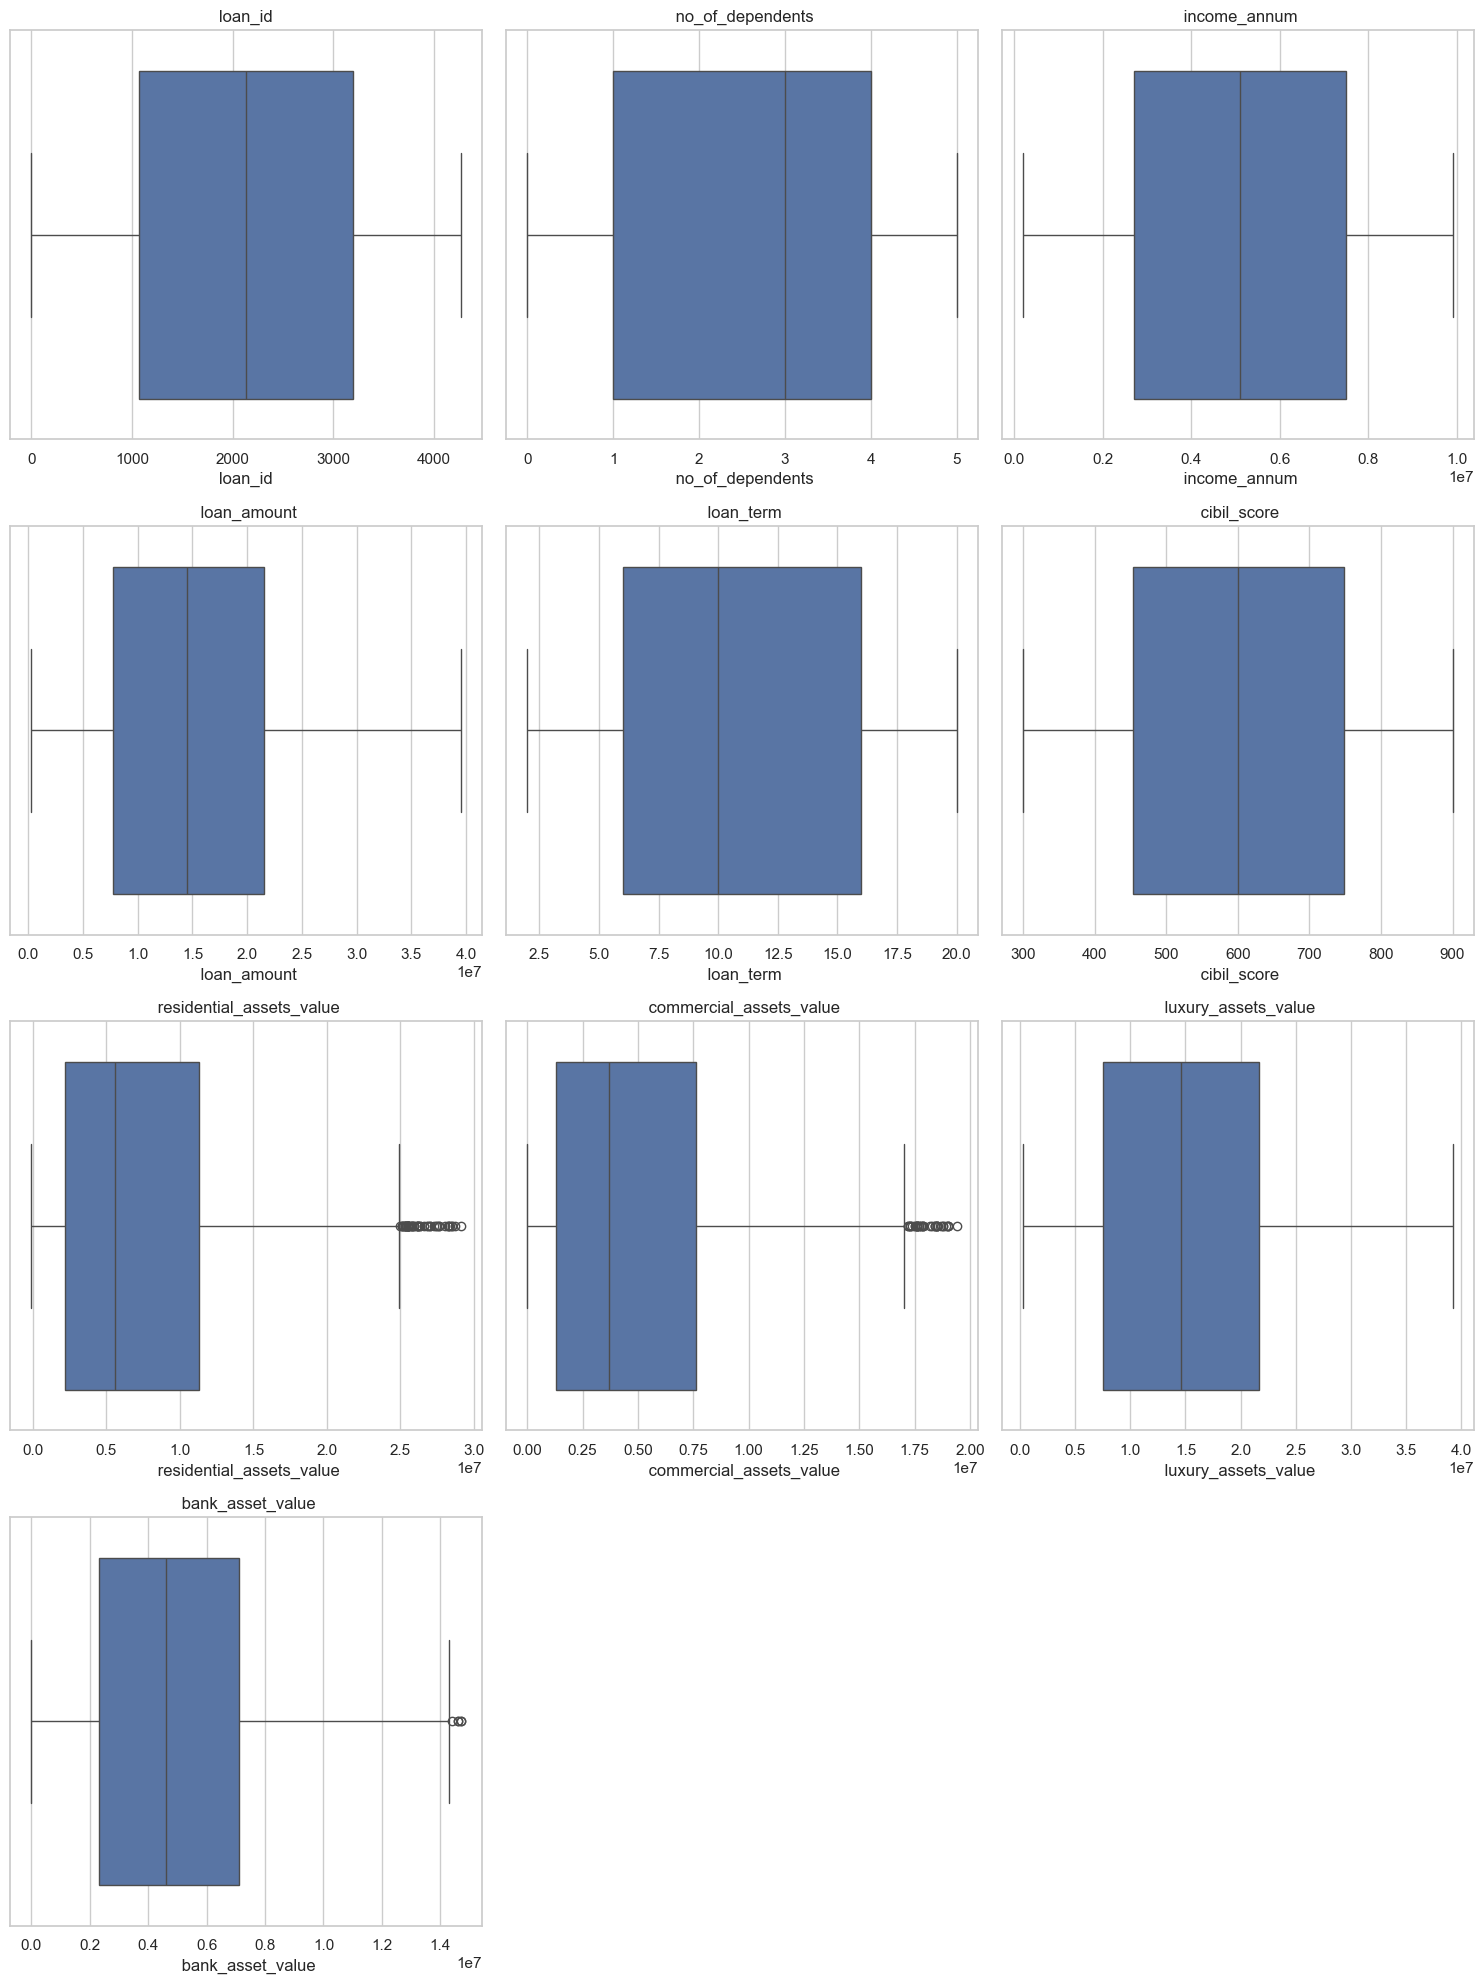

In [10]:
# 9) Outlier detection (boxplots)
plt.figure(figsize=(15, 5*rows))
for i, col in enumerate(cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [11]:
# 10) Categorical value counts
for col in cat_cols:
    print(f"Column: {col}")
    display(df[col].value_counts().head(20))
    print("\n")

Column:  education


 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64



Column:  self_employed


 self_employed
Yes    2150
No     2119
Name: count, dtype: int64



Column:  loan_status


 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

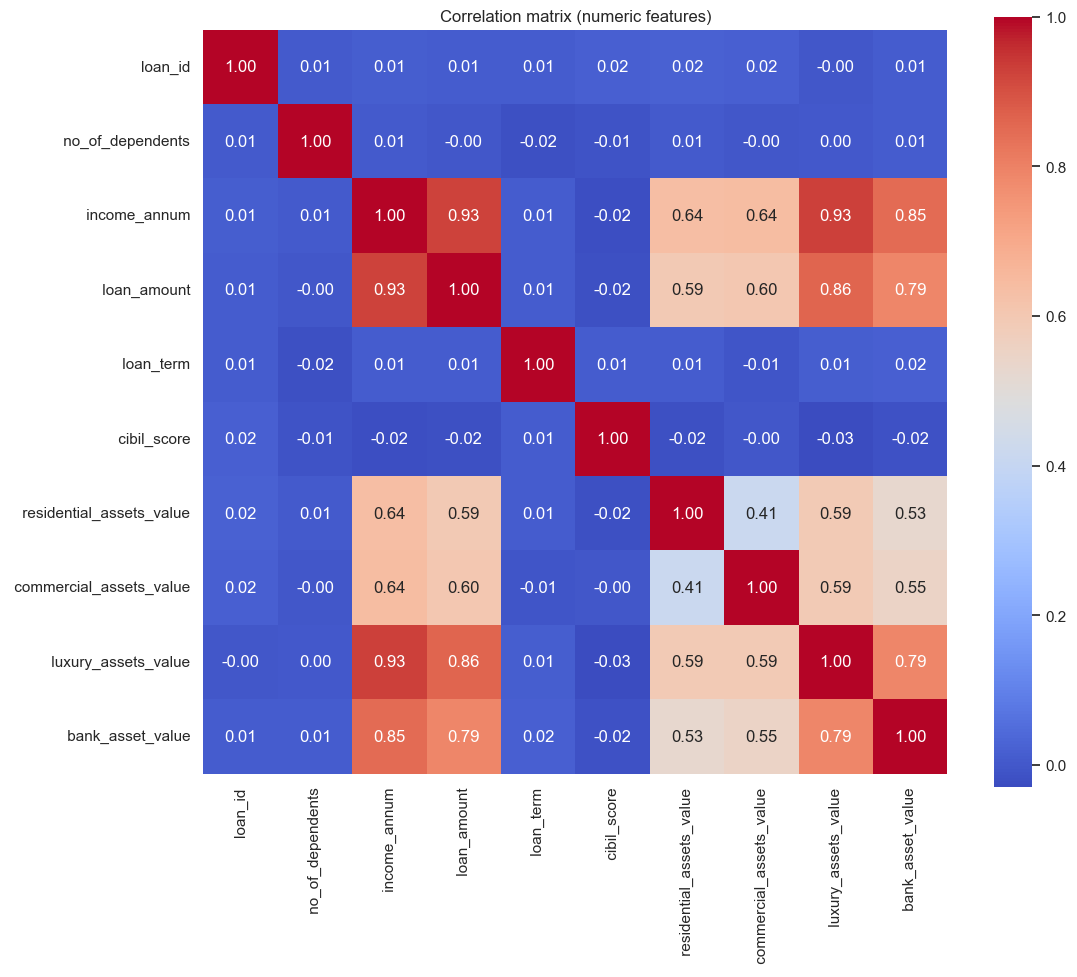

In [12]:
# 11) Correlation heatmap (numeric only)
plt.figure(figsize=(12,10))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation matrix (numeric features)")
plt.show()

In [ ]:
# 12) Features most correlated with target
if target_col:
    corr_target = corr[target_col].dropna().sort_values(key=abs, ascending=False)
    display(corr_target.head(15))
else:
    print("Target column not found.")

In [ ]:
# 13) Pairplot for selected key numeric features
sample_cols = []
if target_col:
    corrs = corr[target_col].abs().sort_values(ascending=False)
    sample_cols = [c for c in corrs.index if c != target_col][:6]
else:
    sample_cols = num_cols[:6]

print("Pairplot features:", sample_cols)
sns.pairplot(df[sample_cols + [target_col]] if target_col else df[sample_cols])
plt.show()

In [20]:
# 14) Numeric features vs target (boxplots)
if target_col:
    plt.figure(figsize=(15, 5*math.ceil(len(sample_cols)/3)))
    for i, col in enumerate(sample_cols, 1):
        plt.subplot(math.ceil(len(sample_cols)/3), 3, i)
        sns.boxplot(x=df[target_col], y=df[col])
        plt.title(f"{col} by {target_col}")
    plt.tight_layout()
    plt.show()
else:
    print("Target column not defined")

<Figure size 1500x0 with 0 Axes>

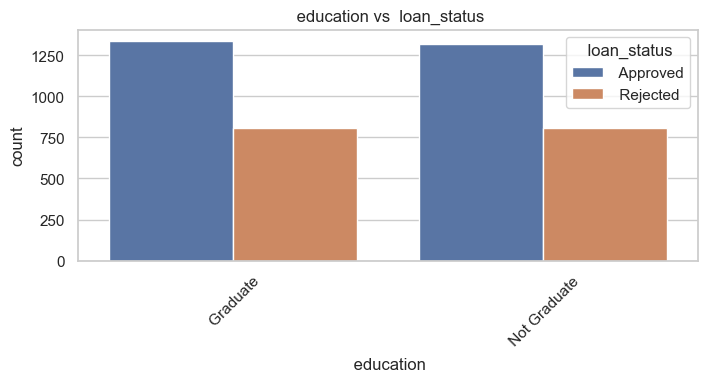

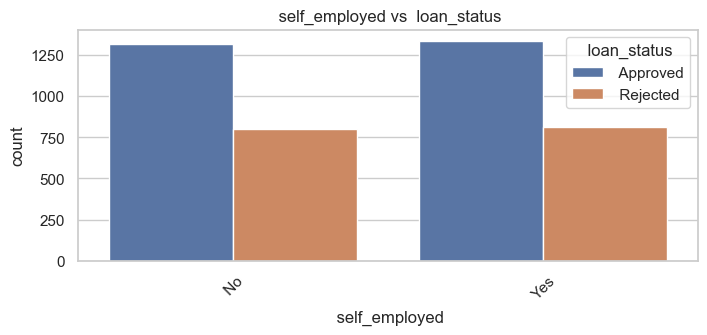

In [19]:
# 15) Categorical features vs target
for col in cat_cols:
    if col == target_col:
        continue
    plt.figure(figsize=(8,3))
    sns.countplot(x=col, hue=target_col, data=df)
    plt.title(f"{col} vs {target_col}")
    plt.xticks(rotation=45)
    plt.show()

## Missing value treatment suggestions
- If missing values exist, consider `df[col].fillna(df[col].mode()[0])` for categorical, and median for numeric.
- Log any dropped rows and store counts.


## Feature engineering ideas
- Create debt-to-income ratio: `loan_amount / income_annum`.
- Bin `cibil_score` into categories (poor, fair, good, excellent).
- Interaction terms: `income_annum * bank_asset_value`.
- Aggregate asset columns into `total_assets`.

In [ ]:
# 16) Save a model-ready sample (optional)
out_path = "data/processed/ready_for_modeling_sample.csv"
df.to_csv(out_path, index=False)
print("Saved sample to", out_path)

## Conclusions & Next Steps
- Summary of main findings and recommended modeling steps:
  1. Finalize feature set (including engineered features).
  2. Handle imbalance via SMOTE or class weights.
  3. Train baseline models and evaluate with precision/recall/F1.
  4. Use SHAP or feature importance to explain predictions.
